# Efficient Frontier

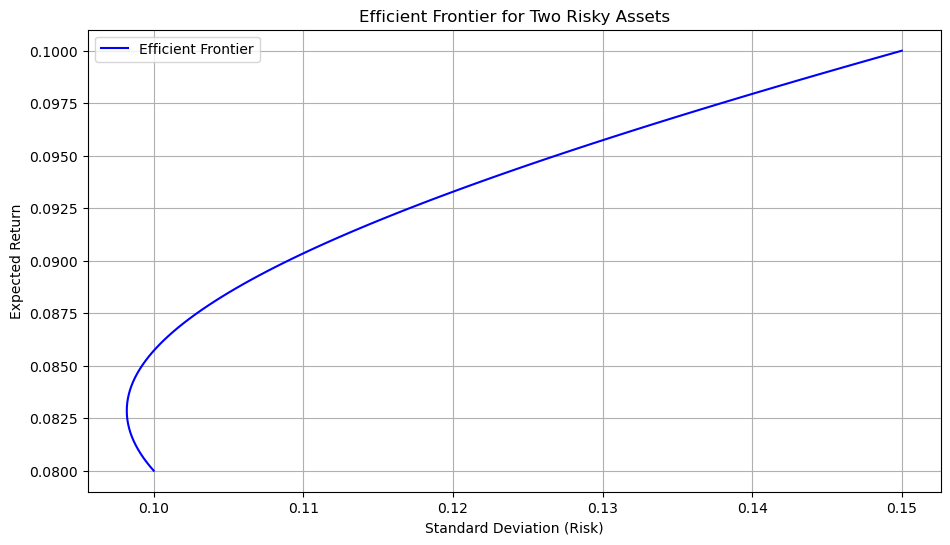

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rf = 0.03
expected_return_A = 0.10
expected_return_B = 0.08
std_dev_A = 0.15
std_dev_B = 0.10
rho = 0.5

# Generate weights for Asset A
weights_A = np.linspace(0, 1, 100)
weights_B = 1 - weights_A

# Calculate portfolio expected return and standard deviation
portfolio_returns = weights_A * expected_return_A + weights_B * expected_return_B
portfolio_std_devs = np.sqrt(weights_A**2 * std_dev_A**2 +
                             weights_B**2 * std_dev_B**2 +
                             2 * weights_A * weights_B * std_dev_A * std_dev_B * rho)

# Plot the efficient frontier
plt.figure(figsize=(11, 6))
plt.plot(portfolio_std_devs, portfolio_returns, label='Efficient Frontier', color='blue')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for Two Risky Assets')
plt.legend()
plt.grid(True)
plt.show()


# Security Market Line

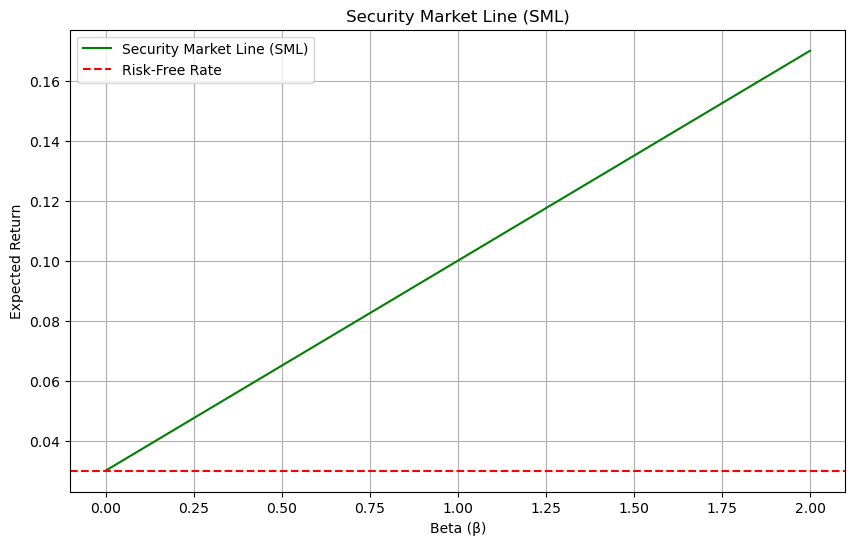

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rf = 0.03
expected_return_market = 0.10

# Beta range
betas = np.linspace(0, 2, 100)

# Calculate expected returns using the CAPM formula
expected_returns = rf + betas * (expected_return_market - rf)

# Plot the Security Market Line (SML)
plt.figure(figsize=(10, 6))
plt.plot(betas, expected_returns, label='Security Market Line (SML)', color='green')
plt.xlabel('Beta (β)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML)')
plt.axhline(y=rf, color='r', linestyle='--', label='Risk-Free Rate')
plt.legend()
plt.grid(True)
plt.show()


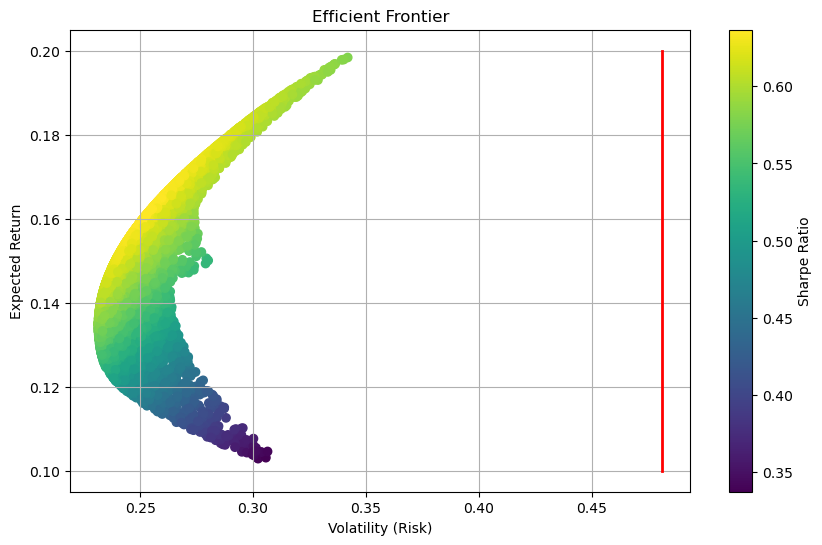

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Example data (expected returns and covariance matrix)
mu = np.array([0.1, 0.2, 0.15])  # Expected returns of assets
Sigma = np.array([[0.1, 0.03, 0.02],
                  [0.03, 0.12, 0.06],
                  [0.02, 0.06, 0.08]])  # Covariance matrix of asset returns

# Number of assets
n = len(mu)

# Objective function (portfolio volatility)
def objective_function(weights, Sigma):
    return np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))

# Constraints (sum of weights = 1)
def constraint(weights):
    return np.sum(weights) - 1.0

# Generate random portfolios
num_portfolios = 10000
np.random.seed(0)
weights = np.random.random((num_portfolios, n))
weights /= weights.sum(axis=1, keepdims=True)

port_returns = np.dot(weights, mu)
port_volatility = np.zeros(num_portfolios)
for i in range(num_portfolios):
    port_volatility[i] = objective_function(weights[i], Sigma)

# Calculate efficient frontier
target_returns = np.linspace(min(mu), max(mu), 100)
efficient_portfolios = []
for target_return in target_returns:
    # Minimize volatility subject to target return
    constraints = ({'type': 'eq', 'fun': constraint})
    bounds = tuple((0, 1) for asset in range(n))
    initial_guess = np.ones(n) / n  # Equal weights initially
    result = minimize(objective_function, initial_guess, args=(Sigma,), method='SLSQP',
                      constraints=constraints, bounds=bounds)
    
    if result.success:
        efficient_portfolios.append((np.sqrt(result.fun), target_return))
    else:
        raise ValueError(result.message)

efficient_portfolios = np.array(efficient_portfolios)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=port_returns / port_volatility, marker='o', cmap='viridis')
plt.plot(efficient_portfolios[:, 0], efficient_portfolios[:, 1], 'r-', linewidth=2)
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()
